In [16]:
import pandas as pd

In [17]:
#df=pd.read_csv('Bagweight.txt',delimiter= "\t" )

In [22]:
df=pd.read_csv('NKgE2MCPS52oBNjAjyudNA_7ccee294a9334085af6a58bf5e4d16f1_ShearedSheet (1).txt',delimiter= "\t" )

<AxesSubplot: >

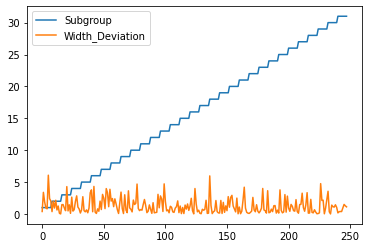

In [23]:
df.plot()

In [26]:
# To calculate the centerline for the Xbar chart, we need to compute the average of the subgroup averages.
# Each subgroup in this case is a production lot.

# Grouping the data by 'Subgroup' and calculating the mean of 'Width_Deviation' for each subgroup.
subgroup_means = df.groupby('Subgroup')['Width_Deviation'].mean()

# Calculating the overall average (centerline) for the Xbar chart.
xbar_centerline = subgroup_means.mean()

# To calculate the centerline for the dispersion chart, which is typically an R-bar chart in this context,
# we need to calculate the average range of the subgroups.

# Calculating the range (max-min) for each subgroup.
subgroup_ranges = df.groupby('Subgroup')['Width_Deviation'].apply(lambda x: x.max() - x.min())

# Calculating the overall average range (R-bar).
rbar_centerline = subgroup_ranges.mean()

xbar_centerline, rbar_centerline


(1.2477419354838712, 3.173225806451613)

In [27]:
# Calculating the standard deviation for each subgroup.
subgroup_std = df.groupby('Subgroup')['Width_Deviation'].std()

# Calculating the average standard deviation (centerline for the S chart).
sbar_centerline = subgroup_std.mean()

# Constants for Xbar chart using S chart (n=8)
A3 = 1.954  # A3 factor for n=8

# Calculating UCL and LCL for the Xbar chart using S chart constants
UCL_xbar_s = xbar_centerline + A3 * sbar_centerline
LCL_xbar_s = xbar_centerline - A3 * sbar_centerline

# Constants for S chart
B3 = 0.184  # B3 factor for n=8
B4 = 2.114  # B4 factor for n=8

# Calculating UCL and LCL for the S chart
UCL_s = B4 * sbar_centerline
LCL_s = B3 * sbar_centerline

sbar_centerline, UCL_xbar_s, LCL_xbar_s, UCL_s, LCL_s

(1.1341956961726731,
 3.4639603258052745,
 -0.968476454837532,
 2.397689701709031,
 0.20869200809577185)

In [ ]:

nqtr(summary.continuous(Bagofweights$Deviation), 5)
summary(Bagofweights$Deviation)
hist.grouped(Bagofweights$Deviation, anchor.value = 38)
hist.grouped(Bagofweights$Deviation, xlim=c(min(Bagofweights$Deviation),max(Bagofweights$Deviation)), anchor.value = min(Bagofweights$Deviation),main = "Original Temperature Data")
hist.add.distribution.curve.normal(x = Bagofweights$Deviation)

spc.individuals.chart(Bagofweights$Deviation)

# When data are slightly positively skewed, and kurtosis
# is ok, the lognormal transformation may be used

# Lognormal Transformation
Bagofweights$Deviation<-log(Bagofweights$Deviation)




# Check transformed data for normality
nqtr(summary.continuous(Bagofweights$Deviation),5)
hist.grouped(Bagofweights$Deviation, anchor.value = 3.61, interval.size = 0.03, freq = F)
hist.add.distribution.curve.normal(x = Bagofweights$Deviation, freq = F)

# Find the Upper Natural Process Limit and 
# Lower Natural Process Limit on the transformed data
natural.tolerance.normal(x = Bagofweights$Deviation)
Delivery.ln<-natural.tolerance.normal(x = Bagofweights$Deviation)
(LNPL.ln<-Delivery.ln$lower.limit)
(UNPL.ln<-Delivery.ln$upper.limit)

# Transform UNPL and LNPL back to original data
(LNPL<-exp(LNPL.ln))
(UNPL<-exp(UNPL.ln))

# Overall natural tolerance
UNPL-LNPL

# Create X and moving range chart with new limits for X chart
spc.chart.variables.individual.and.movingrange.generic.simple(individuals = Bagofweights$Deviation
                                                              ,chart1.center.line = median(Bagofweights$Deviation)
                                                              ,chart1.control.limits.lcl = LNPL
                                                              ,chart1.control.limits.ucl = UNPL)